In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import AgglomerativeClustering


In [2]:
data = pd.read_csv('../Processes/Suma/Suma_todasLasSesiones.csv')
a_r = pd.read_csv('../aprobados_reprobados.csv')
resultado = pd.merge(left=data, right=a_r, left_on='Id', right_on='ID',how ='left')

In [3]:
data.shape

(443, 12)

In [4]:
train = data.copy()
#test = data.tail(3)

In [5]:
data.columns

Index(['Sesion', 'Id', 'Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm', 'Nota'],
      dtype='object')

In [6]:
X=train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']].to_numpy() #Nota

In [7]:
X

array([[  1.,   1.,   3., ...,  39.,   6.,   0.],
       [  1.,  72.,  10., ...,  47.,  18.,   0.],
       [  1.,   2., 103., ...,  95.,  21.,   0.],
       ...,
       [ 11.,   3., 215., ..., 210., 123.,   0.],
       [  2.,  11., 245., ..., 115.,  48.,   0.],
       [  2.,   3.,   8., ...,  94.,  68.,   1.]])

In [8]:
X.shape

(443, 9)

### Normalizan los datos

In [9]:
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0,1))
X_std = scaler.fit_transform(X)

In [10]:
X_std

array([[0.00387597, 0.00137174, 0.00384615, ..., 0.01246334, 0.0027688 ,
        0.        ],
       [0.00387597, 0.09876543, 0.01282051, ..., 0.01539589, 0.00830641,
        0.        ],
       [0.00387597, 0.00274348, 0.13205128, ..., 0.0329912 , 0.00969082,
        0.        ],
       ...,
       [0.04263566, 0.00411523, 0.27564103, ..., 0.07514663, 0.0567605 ,
        0.        ],
       [0.00775194, 0.01508916, 0.31410256, ..., 0.04032258, 0.02215044,
        0.        ],
       [0.00775194, 0.00411523, 0.01025641, ..., 0.03262463, 0.03137979,
        0.00833333]])

### Cluster

In [11]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pylab as plt


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [12]:
def cluster_ac(x, n_clusters, link, aff):
    ac = AgglomerativeClustering(n_clusters=n_clusters, affinity=aff, linkage=link)
    #Se realiza el entrenamientio
    ac.fit(x)
    return ac.labels_

In [13]:
def graficarCS(train, link, metodo='calinski_harabasz'):
    aff=['euclidean','cosine','l1','l2']
    for a in aff:
        print('Con link= %s y affinity= %s '%(link,a))
        cluster = AgglomerativeClustering(affinity=a, linkage=link)
        visualizer = KElbowVisualizer(cluster, k=(2,10), metric=metodo, timings=False)
        visualizer.fit(train)        # Fit the data to the visualizer
        visualizer.show()  

Con link= ward y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


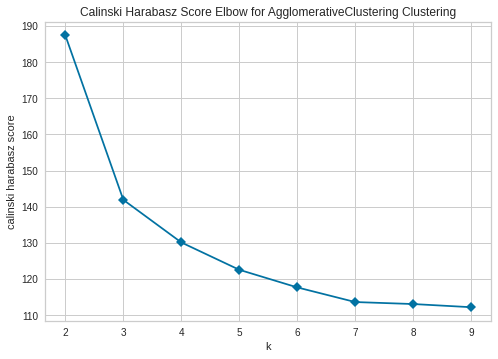

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [14]:
graficarCS(X_std,'ward')

Con link= ward y affinity= euclidean 


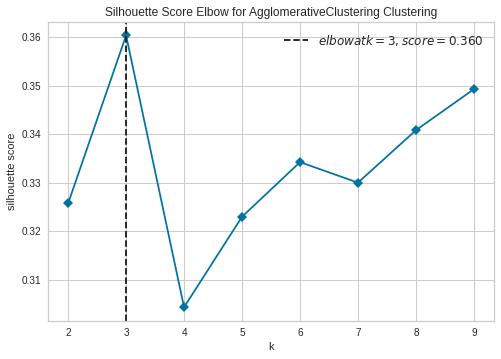

Con link= ward y affinity= cosine 


ValueError: cosine was provided as affinity. Ward can only work with euclidean distances.

In [15]:
graficarCS(X_std,'ward','silhouette')

Con link= single y affinity= euclidean 


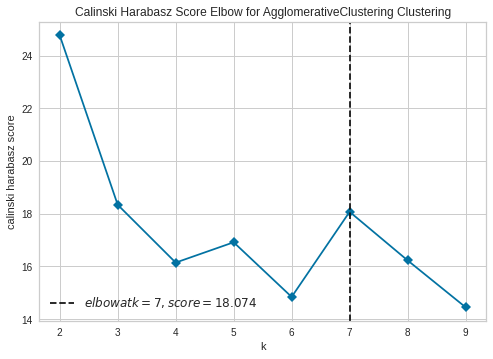

Con link= single y affinity= cosine 


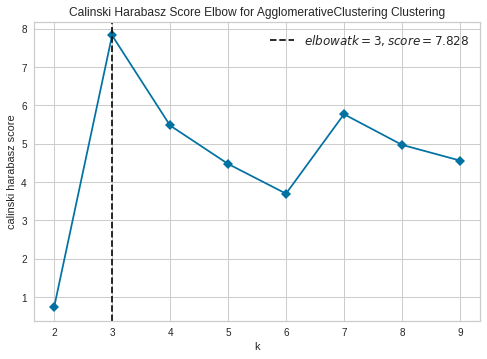

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


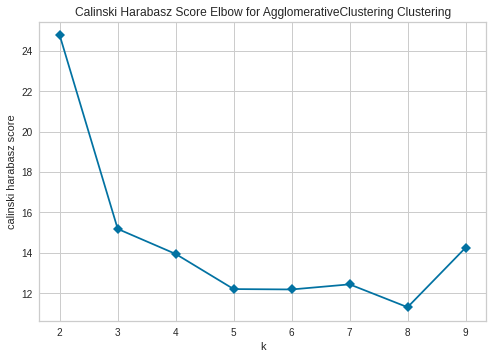

Con link= single y affinity= l2 


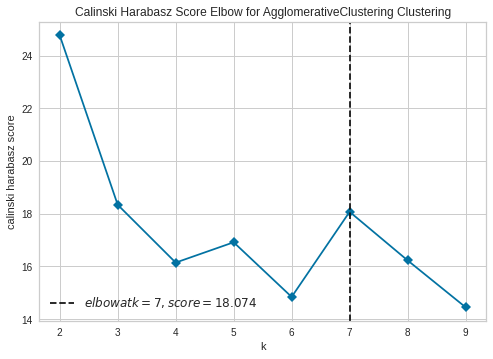

In [16]:
graficarCS(X_std,'single')

Con link= single y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


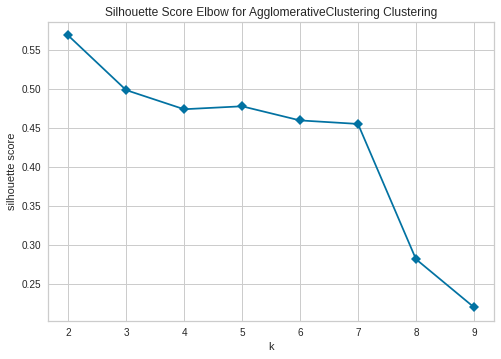

Con link= single y affinity= cosine 


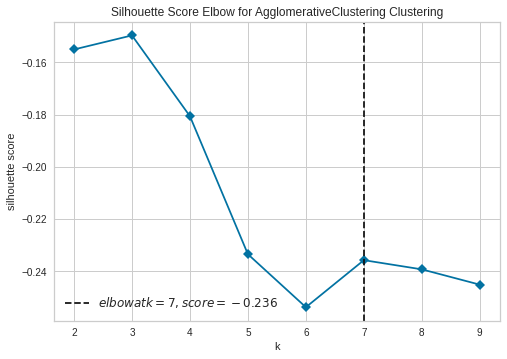

Con link= single y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


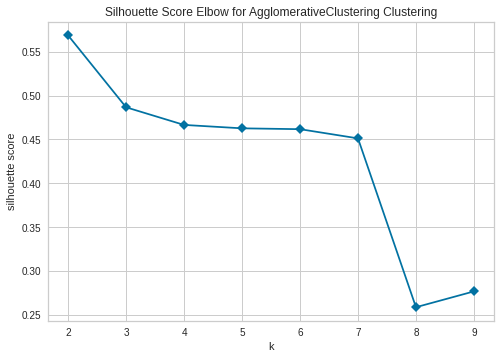

Con link= single y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


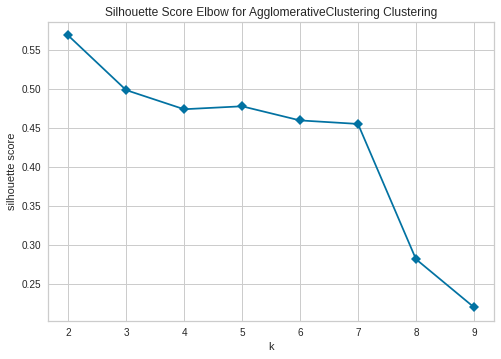

In [17]:
graficarCS(X_std,'single','silhouette')

Con link= complete y affinity= euclidean 


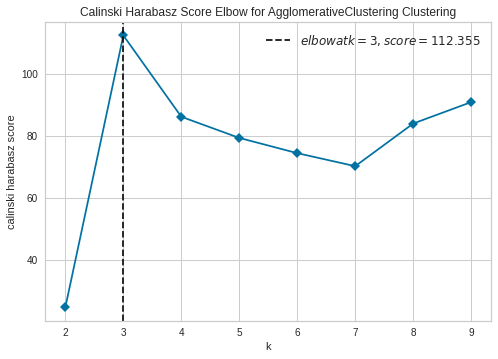

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


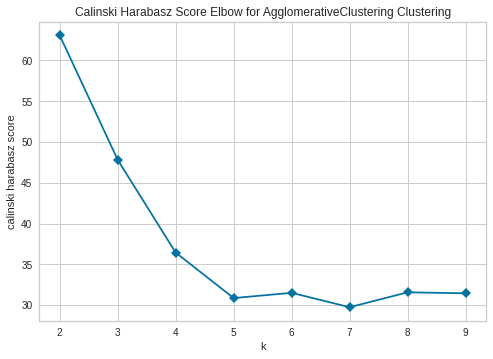

Con link= complete y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


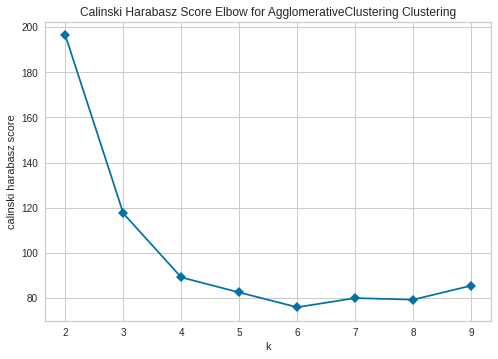

Con link= complete y affinity= l2 


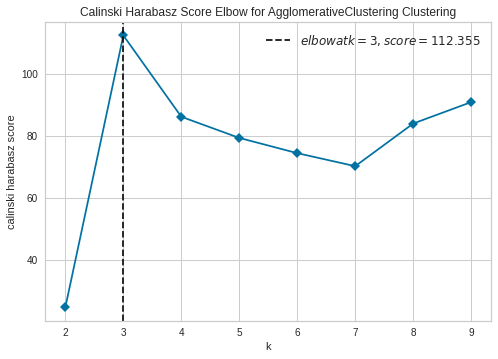

In [18]:
graficarCS(X_std,'complete')

Con link= complete y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


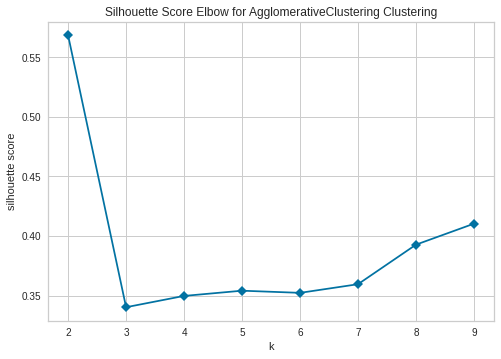

Con link= complete y affinity= cosine 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


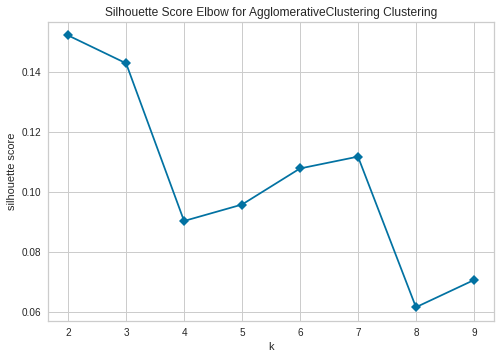

Con link= complete y affinity= l1 


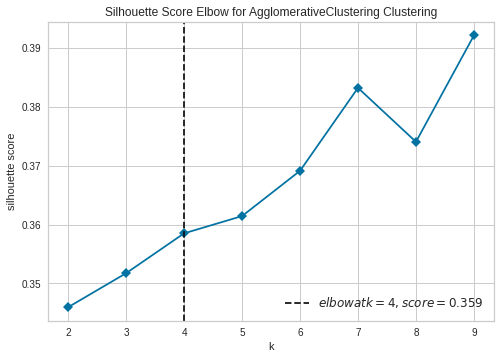

Con link= complete y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


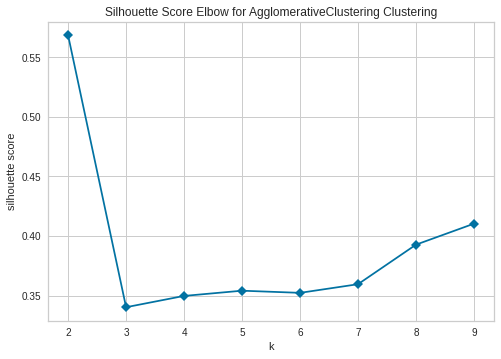

In [19]:
graficarCS(X_std,'complete','silhouette')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


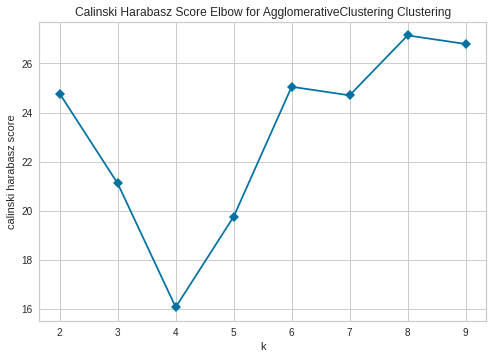

Con link= average y affinity= cosine 


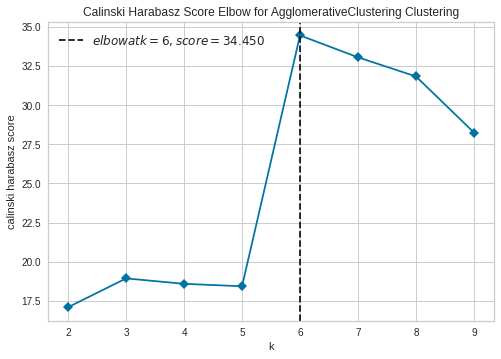

Con link= average y affinity= l1 


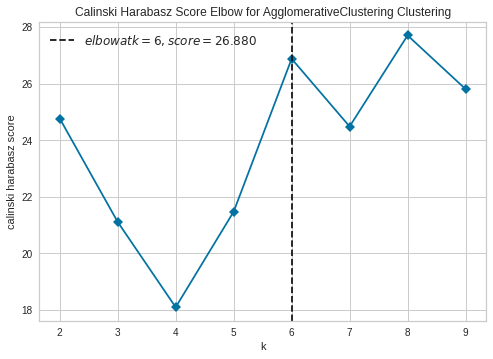

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


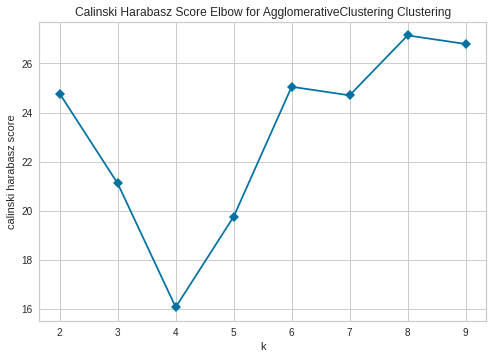

In [20]:
graficarCS(X_std,'average')

Con link= average y affinity= euclidean 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


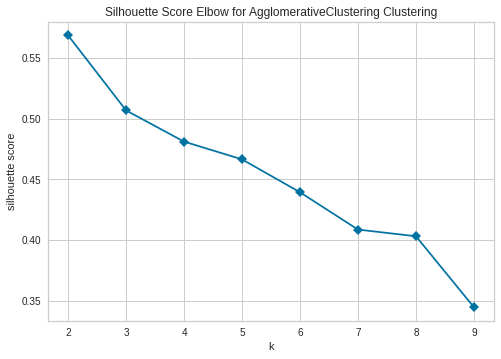

Con link= average y affinity= cosine 


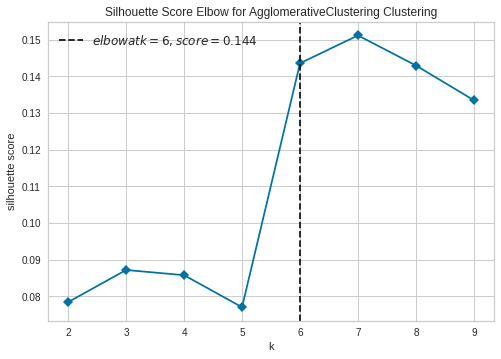

Con link= average y affinity= l1 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


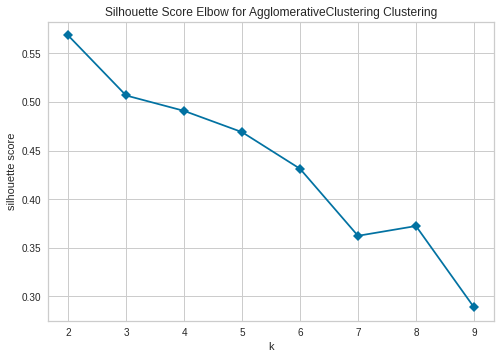

Con link= average y affinity= l2 


/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
/home/moises/Documentos/Machine Learning/sesion6/ml/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


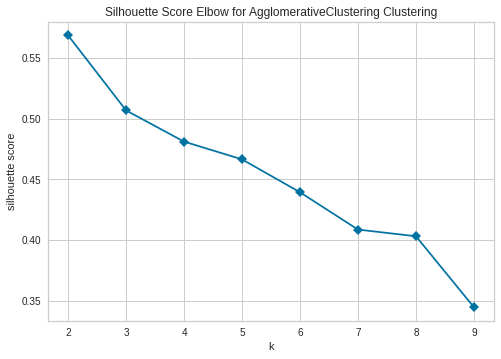

In [21]:
graficarCS(X_std,'average','silhouette')

## Clustering

In [22]:
# ward 4
# single ecludian 3
# single cosine 3
# AVERAGE ECLUDIAN 3
# average l2 3

In [17]:
## mejores opciones obtenidas de acuerdo al silouhette score
ward = cluster_ac(X_std, 3, 'ward', 'euclidean')
singleE = cluster_ac(X_std, 3, 'single', 'euclidean')
singlel1 = cluster_ac(X_std, 3, 'single', 'cosine')
#singlel1 = cluster_ac(X_std, 5, 'single', 'l1')
# completel1 = cluster_ac(X_std, 9, 'complete', 'l1')
# completeC = cluster_ac(X_std, 6, 'complete', 'cosine')
averageE = cluster_ac(X_std, 3, 'average', 'euclidean')
averageC = cluster_ac(X_std, 6, 'average', 'cosine')
averagel2 = cluster_ac(X_std, 3, 'average', 'l2')
#averagel1 = cluster_ac(X_std, 4, 'average', 'l1')

## Reducir las dimensiones para visualizar

In [18]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [19]:
def reducir_dim_tsne(x, ndim):
    pca = TSNE(n_components=ndim)
    return pca.fit_transform(x)


In [21]:
results = pd.DataFrame(np.column_stack([reducir_dim_tsne(X_std,2),ward,singleE,singlel1,
                                        averageE,averagel2, averageC]), 
                      columns=["x", "y", 'AGWE',"AGSE", "AGSl1",'AGAE','AGAl2', 'AGAC'])

## Mostrar los resultados

In [23]:
import seaborn as sns

In [43]:
def mostrar_resultados(res):
    """Muestra los resultados de los algoritmos
    """
    fig, ax = plt.subplots(6,1 , figsize=(10, 50))
    sns.scatterplot(data=res, x="x", y="y", hue="AGSE", ax=ax[0], legend="full")
    ax[0].set_title('AGSE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGSl1", ax=ax[1], legend="full")
    ax[1].set_title('AGSl1')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCl1", ax=ax[2], legend="full")
#     ax[2].set_title('AGCl1')
#     sns.scatterplot(data=res, x="x", y="y", hue="AGCC", ax=ax[3], legend="full")
#     ax[3].set_title('AGCC')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAE", ax=ax[2], legend="full")
    ax[2].set_title('AGAE')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAl2", ax=ax[3], legend="full")
    ax[3].set_title('AGAl2')
    sns.scatterplot(data=res, x="x", y="y", hue="AGWE", ax=ax[4], legend="full")
    ax[4].set_title('Agglomerative Cluster Ward')
    sns.scatterplot(data=res, x="x", y="y", hue="AGAC", ax=ax[5], legend="full")
    ax[5].set_title('AGAC')

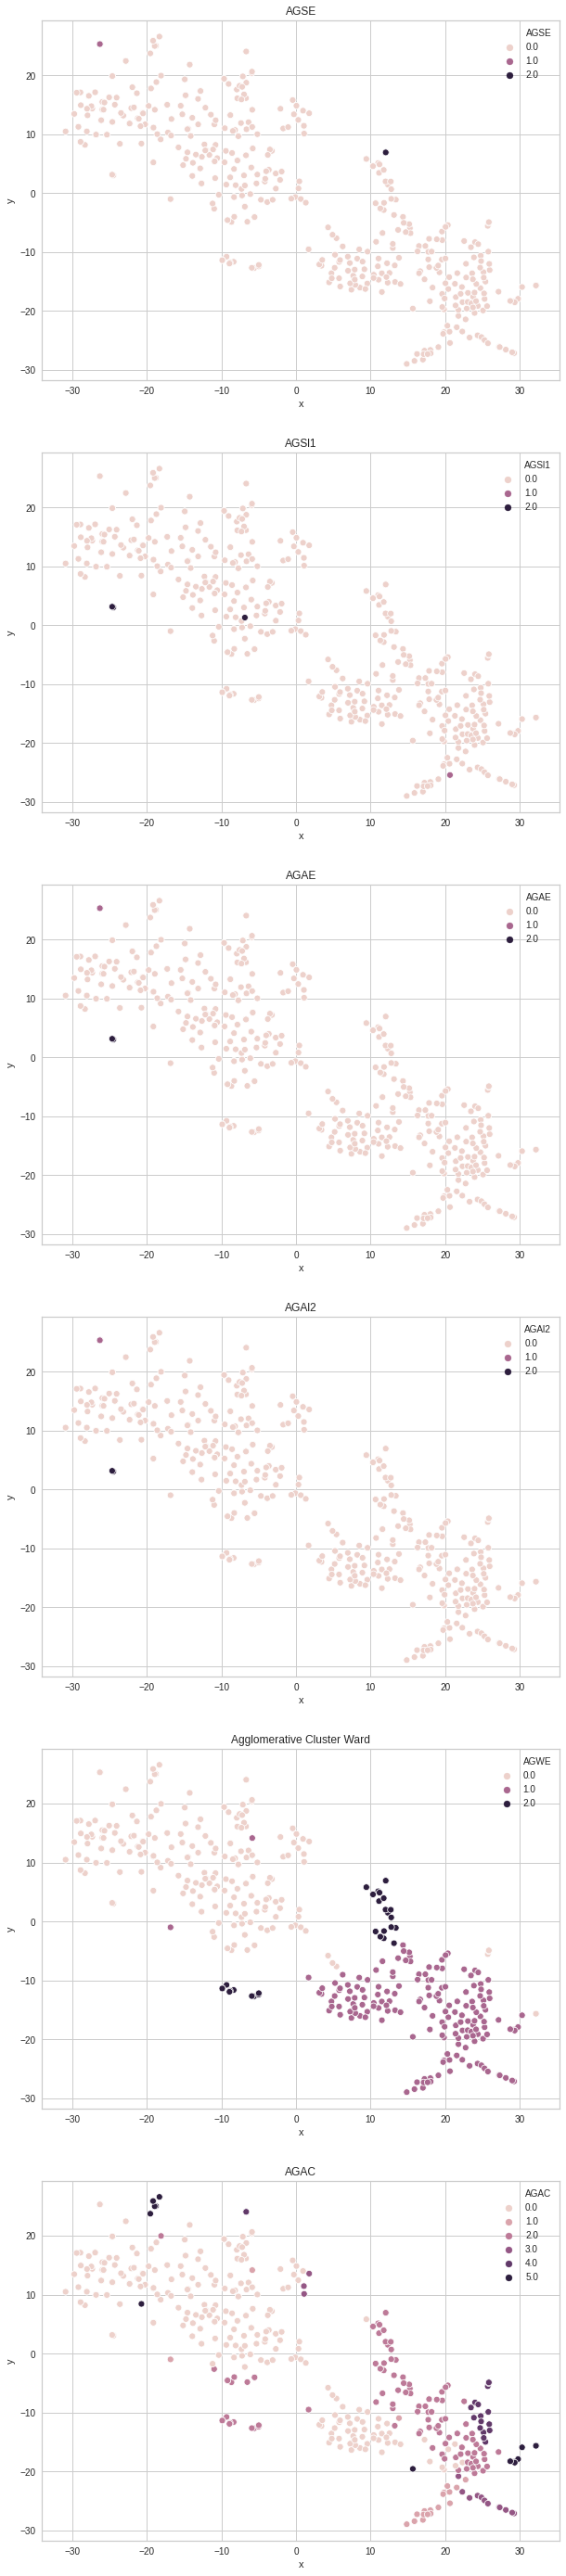

In [44]:
mostrar_resultados(results)

### Obtiene el numero de instancias por cada cluster

In [27]:
def getElements(cluster):
    unique, counts = np.unique(cluster, return_counts=True)
    return dict(zip(unique,counts))

In [28]:
getElements(ward)

{0: 240, 1: 171, 2: 32}

In [29]:
#getElements(completeC)

In [30]:
getElements(averageC)

{0: 267, 1: 21, 2: 106, 3: 16, 4: 18, 5: 15}

## relaciona con aprobados o reprobados

In [35]:
aprobado = resultado[['aprobar']]

In [46]:
columnas = ['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']+['cluster']+list(aprobado.columns)

In [51]:
#union1 = pd.DataFrame(np.column_stack([X_std,completel1,aprobado]),columns=columnas)
train1 = train[['Study', 'Deeds', 'Texteditor', 'Diagram', 'Properties',
       'Other', 'Blank', 'Aulaweb', 'Fsm']]

In [52]:
union2 = pd.DataFrame(np.column_stack([train1,ward,aprobado]),columns=columnas)
union2.groupby(by=['cluster','aprobar']).count()

Study  Deeds  Texteditor  Diagram  Properties  Other  Blank  \
cluster aprobar                                                                
0.0     0.0        119    119         119      119         119    119    119   
        1.0        121    121         121      121         121    121    121   
1.0     0.0         84     84          84       84          84     84     84   
        1.0         87     87          87       87          87     87     87   
2.0     0.0         16     16          16       16          16     16     16   
        1.0         16     16          16       16          16     16     16   

                 Aulaweb  Fsm  
cluster aprobar                
0.0     0.0          119  119  
        1.0          121  121  
1.0     0.0           84   84  
        1.0           87   87  
2.0     0.0           16   16  
        1.0           16   16

In [53]:
conteo=union2.groupby(by=['cluster','aprobar']).count()
media = union2.groupby(by=['cluster','aprobar']).mean()
conteo.rename(columns={'Study':'Estudiantes'}, inplace =True)
conteo= conteo[['Estudiantes']]
pd.merge(conteo, media, on=['cluster','aprobar'])

Estudiantes      Study      Deeds  Texteditor      Diagram  \
cluster aprobar                                                               
0.0     0.0              119  11.134454  10.201681   60.781513  2139.739496   
        1.0              121  18.537190   5.000000   54.396694  2558.239669   
1.0     0.0               84  11.571429  21.738095   14.035714   331.071429   
        1.0               87   4.183908  34.517241   14.574713   455.597701   
2.0     0.0               16  20.062500   8.625000   39.062500  1207.187500   
        1.0               16   4.312500   1.750000   36.625000  1512.562500   

                 Properties        Other       Blank     Aulaweb       Fsm  
cluster aprobar                                                             
0.0     0.0      351.126050   782.168067  313.840336  162.865546  1.142857  
        1.0      305.297521   730.206612  230.512397  136.107438  2.975207  
1.0     0.0       26.416667   395.583333  120.738095  102.607143  0.023810  
        1.0       22.804598   388.068966  111.563218   80.482759  0.011494  
2.0     0.0      169.750000  2590.937500  142.500000  869.062500  1.250000  
        1.0       99.187500  2642.875000  211.687500  542.312500  0.000000

In [39]:
union2[union2['cluster']==2]

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,cluster,aprobar
52,0.000000,0.002743,0.005128,0.019150,0.008606,0.043755,0.504399,0.000000,0.000000,2.0,0.0
61,0.000000,0.001372,0.683333,0.087827,0.012909,0.032046,0.003666,0.000000,0.000000,2.0,0.0
69,0.054264,0.102881,0.608974,0.063834,0.002582,0.027938,0.039223,0.028611,0.000000,2.0,1.0
84,0.000000,0.000000,0.000000,0.255338,0.002582,0.137223,0.125367,0.038302,0.008333,2.0,0.0
92,0.000000,0.000000,0.000000,0.299802,0.035284,0.149959,0.142595,0.069682,0.000000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
424,0.038760,0.000000,0.010256,0.399296,0.154905,0.253698,0.085777,0.104753,0.000000,2.0,0.0
425,0.003876,0.001372,0.007692,0.496368,0.148021,0.156532,0.040689,0.018920,0.000000,2.0,0.0
432,0.034884,0.005487,0.002564,0.549197,0.138554,0.149959,0.147727,0.020305,0.000000,2.0,1.0
438,0.003876,0.001372,0.006410,0.366058,0.290017,0.156532,0.032625,0.103830,0.008333,2.0,0.0


In [40]:
union2.groupby('cluster').mean()

,Study,Deeds,Texteditor,Diagram,Properties,Other,Blank,Aulaweb,Fsm,aprobar
cluster,,,,,,,,,,
0.0,0.047238,0.007116,0.048518,0.299334,0.115722,0.532232,0.063084,0.325652,0.005208,0.500000
1.0,0.052128,0.013871,0.052289,0.711229,0.317591,0.185946,0.081416,0.073613,0.037415,0.653061
2.0,0.061415,0.007999,0.088642,0.383700,0.257927,0.125113,0.109127,0.065701,0.003286,0.401408
3.0,0.030282,0.038738,0.018346,0.086821,0.021152,0.075136,0.040715,0.042155,0.000146,0.508772
